In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [ ]:
! unzip Capsicum.zip

Archive:  Capsicum.zip
   creating: Capsicum/Bacterial_Capsicum/
  inflating: Capsicum/Bacterial_Capsicum/006adb74-934f-448f-a14f-62181742127b___JR_B.Spot 3395.JPG  
  inflating: Capsicum/Bacterial_Capsicum/00f2e69a-1e56-412d-8a79-fdce794a17e4___JR_B.Spot 3132.JPG  
  inflating: Capsicum/Bacterial_Capsicum/01dfb88b-cd5a-420c-b163-51f5fe07b74d___JR_B.Spot 9091.JPG  
  inflating: Capsicum/Bacterial_Capsicum/01ebc916-4793-40a3-b5e4-a32687e4fa3d___NREC_B.Spot 9125.JPG  
  inflating: Capsicum/Bacterial_Capsicum/02baf62e-11e2-4dde-97fb-e369b57d55d3___JR_B.Spot 8971.JPG  
  inflating: Capsicum/Bacterial_Capsicum/03bb7042-3fd5-42e1-aa2c-d51d6843704c___JR_B.Spot 8925.JPG  
  inflating: Capsicum/Bacterial_Capsicum/04d46cfb-9cc8-4083-82af-ca2bb57c8182___NREC_B.Spot 1814.JPG  
  inflating: Capsicum/Bacterial_Capsicum/05af15b5-fbda-4dab-a4ba-c783d531d24d___JR_B.Spot 3150.JPG  
  inflating: Capsicum/Bacterial_Capsicum/05c6ea65-cce4-43da-b57b-a45321b0e51b___NREC_B.Spot 9048.JPG  
  inflating: Capsicu

In [ ]:
BATCH_SIZE = 16
IMAGE_SIZE = 256
CHANNELS = 3

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Capsicum",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 396 files belonging to 2 classes.


In [ ]:
class_names = dataset.class_names
class_names

['Bacterial_Capsicum', 'Healthy_Capsicum']

In [ ]:
for image,label in dataset.take(1):
  print(image.shape)
  print(label.numpy())

(16, 256, 256, 3)
[1 0 1 1 1 1 0 1 1 1 0 1 0 0 1 1]


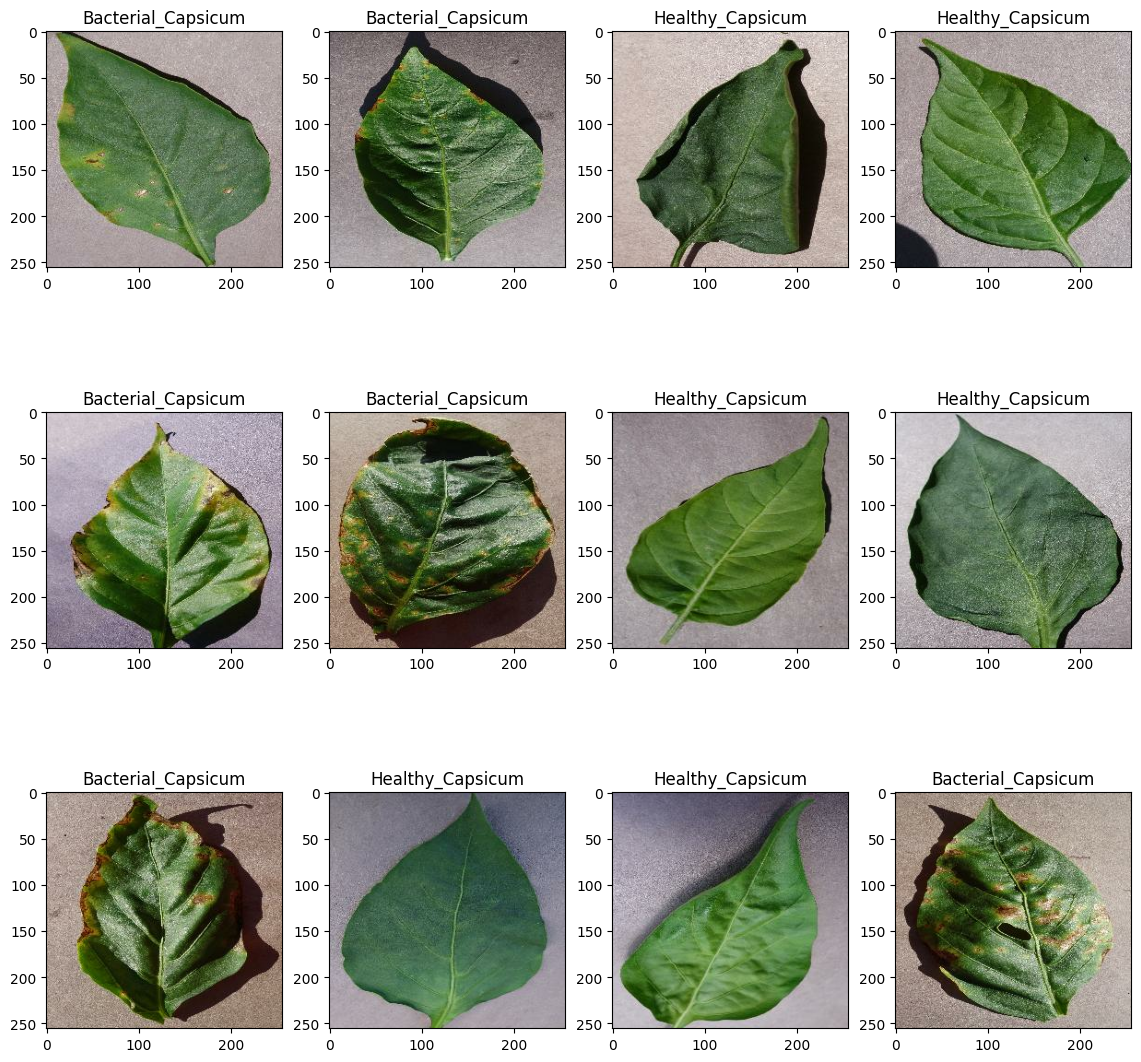

In [ ]:
plt.figure(figsize=(14,14))
for image,label in dataset.take(1):
  for i in range(12):
    ax = plt.subplot(3,4,i+1)
    plt.imshow(image[i].numpy().astype('uint8'))
    plt.title(class_names[label[i]])

In [ ]:
len(dataset)

25

In [ ]:
train_percent = 0.7
int(len(dataset) * train_percent)

17

In [ ]:
train_ds = dataset.take(17)
len(train_ds)

17

In [ ]:
test_data = dataset.skip(17)
len(test_data)

8

In [ ]:
val_ds = test_data.take(4)
len(val_ds)

4

In [ ]:
test_ds = test_data.skip(4)
len(test_ds)

4

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [ ]:
resizing = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0 / 255)
])

In [ ]:
augumentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [ ]:
inp_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)

model = models.Sequential([
    resizing,
    augumentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=inp_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu',input_shape=inp_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu',input_shape=inp_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu',input_shape=inp_shape),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(2,activation='softmax')
])
model.build(input_shape = inp_shape)
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_10 (Sequential)  (16, 256, 256, 3)         0         
                                                                 
 sequential_11 (Sequential)  (16, 256, 256, 3)         0         
                                                                 
 conv2d_32 (Conv2D)          (16, 254, 254, 32)        896       
                                                                 
 max_pooling2d_32 (MaxPooli  (16, 127, 127, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_33 (Conv2D)          (16, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_33 (MaxPooli  (16, 62, 62, 64)          0         
 ng2D)                                               

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(train_ds, batch_size=BATCH_SIZE, epochs=25, validation_data = val_ds ,verbose=1)

Epoch 1/25
17/17 [==============================] - 13s 54ms/step - loss: 0.7218 - accuracy: 0.5037 - val_loss: 0.6901 - val_accuracy: 0.5074
Epoch 2/25
17/17 [==============================] - 1s 45ms/step - loss: 0.6558 - accuracy: 0.6140 - val_loss: 0.5292 - val_accuracy: 0.8346
Epoch 3/25
17/17 [==============================] - 1s 43ms/step - loss: 0.3916 - accuracy: 0.8566 - val_loss: 0.5117 - val_accuracy: 0.8088
Epoch 4/25
17/17 [==============================] - 1s 42ms/step - loss: 0.3466 - accuracy: 0.8676 - val_loss: 0.7799 - val_accuracy: 0.7426
Epoch 5/25
17/17 [==============================] - 1s 43ms/step - loss: 0.4039 - accuracy: 0.8566 - val_loss: 0.3038 - val_accuracy: 0.9228
Epoch 6/25
17/17 [==============================] - 1s 43ms/step - loss: 0.2203 - accuracy: 0.9375 - val_loss: 0.1474 - val_accuracy: 0.9412
Epoch 7/25
17/17 [==============================] - 1s 50ms/step - loss: 0.1018 - accuracy: 0.9669 - val_loss: 0.5989 - val_accuracy: 0.8787
Epoch 8/25
1

In [ ]:
model.evaluate(test_ds)

17/17 [==============================] - 0s 14ms/step - loss: 0.0994 - accuracy: 0.9706


[0.09941837936639786, 0.970588207244873]

Prediction : Healthy_Capsicum
1/1 [==============================] - 0s 29ms/step
Model Prediction: Healthy_Capsicum


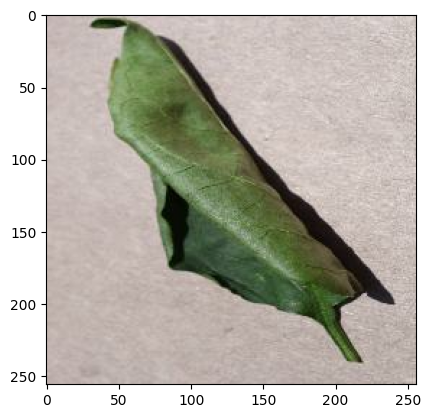

In [ ]:
import numpy as np

for images, labels in dataset.take(1):
    first_image = images[0].numpy().astype('uint8')
    first_label  = labels[0].numpy()

    plt.imshow(first_image)
    print('Prediction :',class_names[first_label])

    pred = model.predict(images)
    print('Model Prediction:',class_names[np.argmax(pred[0])])